# Introducing XGBoost

## XGBoost: Fit/Predict
It's time to create your first XGBoost model! As Sergey showed you in the video, you can use the scikit-learn .fit() / .predict() paradigm that you are already familiar to build your XGBoost models, as the xgboost library has a scikit-learn compatible API!

Here, you'll be working with churn data. This dataset contains imaginary data from a ride-sharing app with user behaviors over their first month of app usage in a set of imaginary cities as well as whether they used the service 5 months after sign-up. It has been pre-loaded for you into a DataFrame called churn_data - explore it in the Shell!

Your goal is to use the first month's worth of data to predict whether the app's users will remain users of the service at the 5 month mark. This is a typical setup for a churn prediction problem. To do this, you'll split the data into training and test sets, fit a small xgboost model on the training set, and evaluate its performance on the test set by computing its accuracy.

pandas and numpy have been imported as pd and np, and train_test_split has been imported from sklearn.model_selection. Additionally, the arrays for the features and the target have been created as X and y.

In [1]:
import xgboost as xgb

### init: 1 dataframe, pd, np, train_test_split

In [2]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(churn_data)
tobedownloaded="{pandas.core.frame.DataFrame: {'churn_data.csv': 'https://file.io/cbZLdj'}}"
prefix='data_from_datacamp/Chap1-Exercise1.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

In [3]:
from platform import python_version

print(python_version())

3.6.7


In [4]:
import pandas as pd
churn_data=pd.read_csv(prefix+'churn_data.csv',index_col=0)

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### code

- Import xgboost as xgb.
- Create training and test sets such that 20% of the data is used for testing. Use a random_state of 123.
- Instantiate an XGBoostClassifier as xg_cl using xgb.XGBClassifier(). Specify n_estimators to be 10 estimators and an objective of 'binary:logistic'. Do not worry about what this means just yet, you will learn about these parameters later in this course.
- Fit xg_cl to the training set (X_train, y_train) using the .fit() method.
- Predict the labels of the test set (X_test) using the .predict() method and hit 'Submit Answer' to print the accuracy.

In [6]:
# Import xgboost
import xgboost as xgb

# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(n_estimators=10, objective='binary:logistic', seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.743300


# What is a decision tree?

## Decision trees
Your task in this exercise is to make a simple decision tree using scikit-learn's DecisionTreeClassifier on the breast cancer dataset that comes pre-loaded with scikit-learn.

This dataset contains numeric measurements of various dimensions of individual tumors (such as perimeter and texture) from breast biopsies and a single outcome value (the tumor is either malignant, or benign).

We've preloaded the dataset of samples (measurements) into X and the target values per tumor into y. Now, you have to split the complete dataset into training and testing sets, and then train a DecisionTreeClassifier. You'll specify a parameter called max_depth. Many other parameters can be modified within this model, and you can check all of them out here.

### init: 2 arrays

In [7]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X, y)
tobedownloaded="{numpy.ndarray: {'X.csv': 'https://file.io/994Wgk',\
  'y.csv': 'https://file.io/mIpNxs'}}"
prefix='data_from_datacamp/Chap1-Exercise2.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{numpy.ndarray: {"X.csv": "https://file.io/994Wgk",  "y.csv": "https://file.io/mIpNxs"}}
{'numpy.ndarray': {'X.csv': 'https://file.io/994Wgk', 'y.csv': 'https://file.io/mIpNxs'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  117k    0  117k    0     0  97891      0 --:--:--  0:00:01 --:--:-- 97891
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3414    0  3414    0     0  11895      0 --:--:-- --:--:-- --:--:-- 11978


In [8]:
from uploadfromdatacamp import loadNDArrayFromCsv
import pandas as pd
X=loadNDArrayFromCsv(prefix+'X.csv')
y=loadNDArrayFromCsv(prefix+'y.csv')


### code

- Import:<br>
-- train_test_split from sklearn.model_selection.<br>
-- DecisionTreeClassifier from sklearn.tree.
- Create training and test sets such that 20% of the data is used for testing. Use a random_state of 123.
- Instantiate a DecisionTreeClassifier called dt_clf_4 with a max_depth of 4. This parameter specifies the maximum number of successive split points you can have before reaching a leaf node.
- Fit the classifier to the training set and predict the labels of the test set.

In [9]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train, y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)


accuracy: 0.956140350877193


# What is Boosting?


## Measuring accuracy
You'll now practice using XGBoost's learning API through its baked in cross-validation capabilities. As Sergey discussed in the previous video, XGBoost gets its lauded performance and efficiency gains by utilizing its own optimized data structure for datasets called a DMatrix.

In the previous exercise, the input datasets were converted into DMatrix data on the fly, but when you use the xgboost cv object, you have to first explicitly convert your data into a DMatrix. So, that's what you will do here before running cross-validation on churn_data.

### init: 2 dataframes, 1 serie, xgboost

In [11]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(churn_data, X, y)
tobedownloaded="{pandas.core.frame.DataFrame: {'X.csv': 'https://file.io/8yXG3o',\
  'churn_data.csv': 'https://file.io/tPtJ5j'},\
 pandas.core.series.Series: {'y.csv': 'https://file.io/ajy6bG'}}"
prefix='data_from_datacamp/Chap1-Exercise3.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"X.csv": "https://file.io/8yXG3o",  "churn_data.csv": "https://file.io/tPtJ5j"}, pandas.core.series.Series: {"y.csv": "https://file.io/ajy6bG"}}
{'pandas.core.frame.DataFrame': {'X.csv': 'https://file.io/8yXG3o', 'churn_data.csv': 'https://file.io/tPtJ5j'}, 'pandas.core.series.Series': {'y.csv': 'https://file.io/ajy6bG'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 1695k    0 1695k    0     0   569k      0 --:--:--  0:00:02 --:--:--  569k
100 2326k    0 2326k    0     0   748k      0 --:--:--  0:00:03 --:--:--  749k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
           

In [12]:
import pandas as pd
churn_data=pd.read_csv(prefix+'churn_data.csv',index_col=0)
X=pd.read_csv(prefix+'X.csv',index_col=0)
y=pd.read_csv(prefix+'y.csv',index_col=0, header=None,squeeze=True)

In [10]:
import xgboost as xgb

### code

- Create a DMatrix called churn_dmatrix from churn_data using xgb.DMatrix(). The features are available in X and the labels in y.
- Perform 3-fold cross-validation by calling xgb.cv(). dtrain is your churn_dmatrix, params is your parameter dictionary, folds is the number of cross-validation folds (3), num_boosting_rounds is the number of trees we want to build (5), metrics is the metric you want to compute (this will be "error", which we will convert to an accuracy).


In [13]:
# Create the DMatrix: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

C:\Users\F279814\AppData\Local\Continuum\anaconda3\envs\xgboost\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


   train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.28232         0.002366          0.28378        0.001932
1           0.26951         0.001855          0.27190        0.001932
2           0.25605         0.003213          0.25798        0.003963
3           0.25090         0.001845          0.25434        0.003827
4           0.24654         0.001981          0.24852        0.000934
0.75148


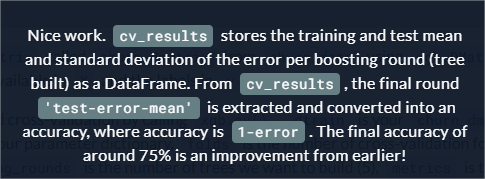

## Measuring AUC
Now that you've used cross-validation to compute average out-of-sample accuracy (after converting from an error), it's very easy to compute any other metric you might be interested in. All you have to do is pass it (or a list of metrics) in as an argument to the metrics parameter of xgb.cv().

Your job in this exercise is to compute another common metric used in binary classification - the area under the curve ("auc"). As before, churn_data is available in your workspace, along with the DMatrix churn_dmatrix and parameter dictionary params.

### code

In [14]:
params={'max_depth': 3, 'objective': 'reg:logistic'}

In [ ]:
import xgboost as xgb

In [15]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.768893       0.001544       0.767863      0.002820
1        0.790864       0.006758       0.789157      0.006846
2        0.815872       0.003900       0.814476      0.005997
3        0.822959       0.002018       0.821682      0.003912
4        0.827528       0.000769       0.826191      0.001937
0.826191


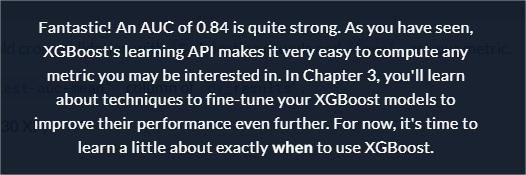

# When should I use XGBoost?


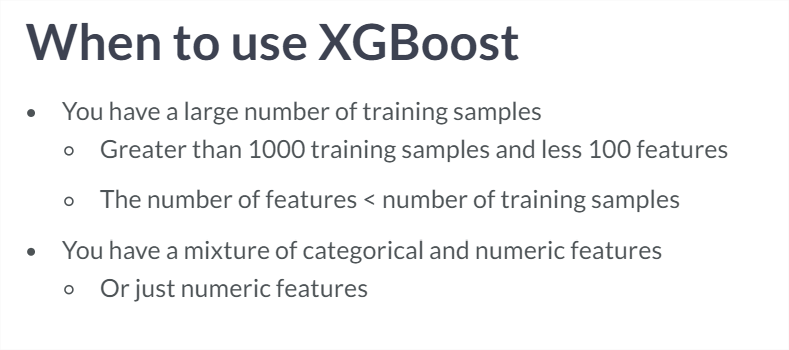

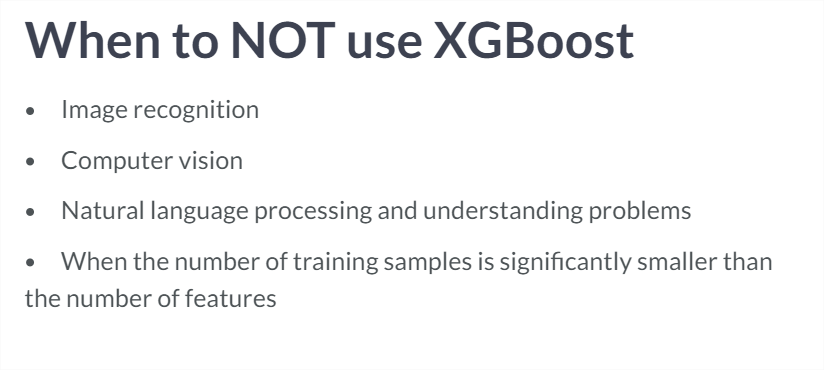